<h2>Лабораторная работа №3. Многомерная безусловная оптимизация</h2>

<h3>Задача - найти точку минимума функции $(x_1 - 10)^2 + (x_2 + 1)^2 + e^{x_1^2 + 2x_2} $ на отрезке $(1; 0)$ с точностью $eps = 0.0003$</h3>
<p>    
    Методы поиска:<br>
    1. Прямого поиска<br>
    2. Многомерного поиска с использованием производных
</p>

<h4>Подключаю библиотеки</h4>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

plt.rcParams["figure.figsize"] = (15,15)

<h4>Создаю функцию</h4>

In [2]:
def func(x1, x2):
    return (x1 - 10) ** 2 + (x2 + 1) ** 2 + np.exp(x1 ** 2 + 2 * x2)

func = np.vectorize(func)

<h4>Строю поверхность функции</h4>

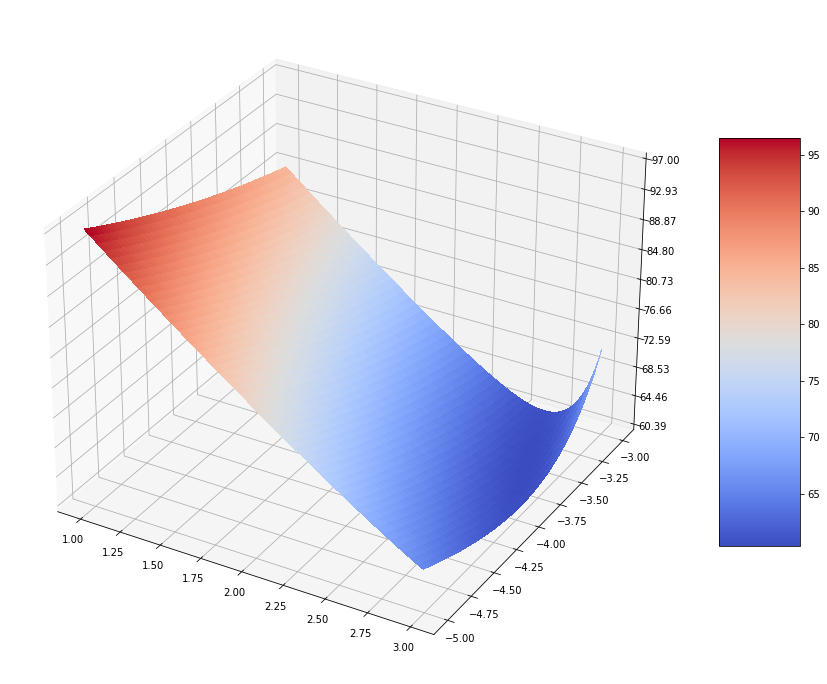

In [3]:
def make_surface():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Make data.
    X = np.arange(1, 3, 0.01)
    Y = np.arange(-5, -3, 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
make_surface()

<h4>Метод Нелдера-Мида и метод симплексов</h4>

In [4]:
class Vector(object):
    def __init__(self, x, y):
        """ Create a vector, example: v = Vector(1,2) """
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)

In [5]:
def nelder_mead(alpha=1, beta=0.5, gamma=2, maxiter=100):
    solution_steps = []
    
    # initialization
    v1 = Vector(0, 0)
    v2 = Vector(1.0, 0)
    v3 = Vector(0, 1)

    for i in range(maxiter):
        adict = {v1:func(*v1.c()), v2:func(*v2.c()), v3:func(*v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        
        
        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if func(*xr.c()) < func(*g.c()):
            w = xr
        else:
            if func(*xr.c()) < func(*w.c()):
                w = xr
            c = (w + mid)/2
            if func(*c.c()) < func(*w.c()):
                w = c
        if func(*xr.c()) < func(*b.c()):

            # expansion
            xe = mid + gamma * (xr - mid)
            if func(*xe.c()) < func(*xr.c()):
                w = xe
            else:
                w = xr
        if func(*xr.c()) > func(*g.c()):
            
            # contraction
            xc = mid + beta * (w - mid)
            if func(*xc.c()) < func(*w.c()):
                w = xc
        
        # update points
        v1 = w
        v2 = g
        v3 = b
        
        solution_steps.append(b)
        
    return b, solution_steps

<h4>Скорость выполнения метода Нелдера-Мида 100 раз и полученное решение</h4>

In [6]:
%%time
for i in range(100):
    solution, steps = nelder_mead()
solution

Wall time: 3.02 s


(2.82859729409231, -3.535321162452842)

<h4>Шаги достижения минимума</h4>

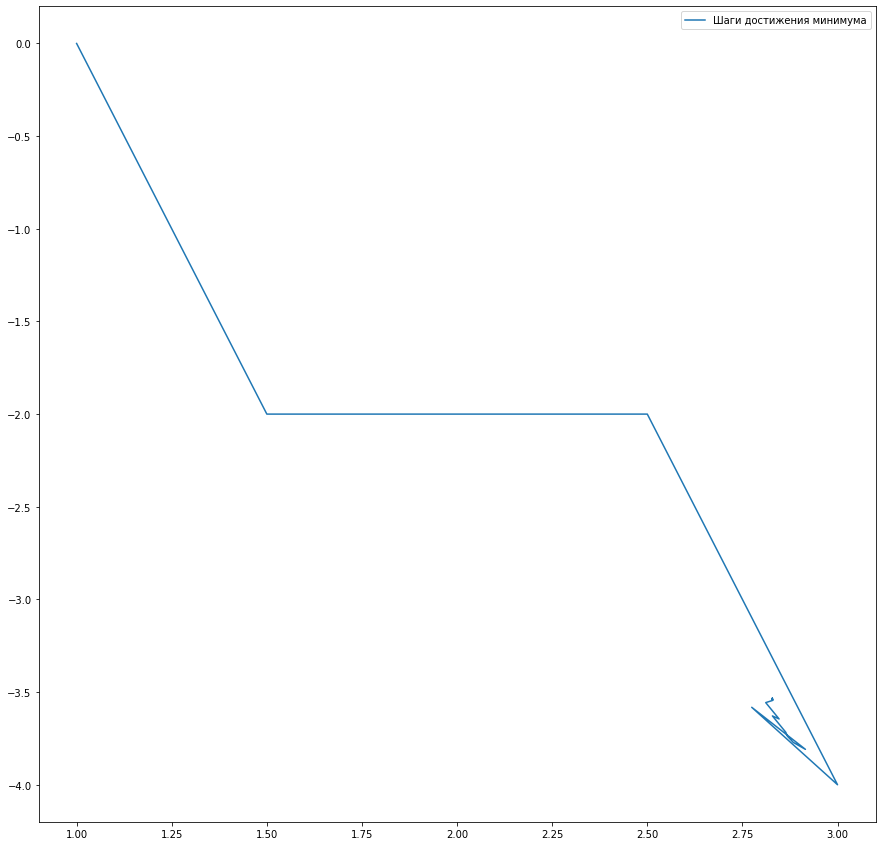

In [7]:
xs, ys = [], []
for vec in steps:
    xs.append(vec.c()[0])
    ys.append(vec.c()[1])
    
plt.plot(xs, ys, label="Шаги достижения минимума")
plt.legend()

<h4>Скорость выполнения метода Симплексов 100 раз и полученное решение</h4>

In [8]:
%%time
for i in range(100):
    solution, steps = nelder_mead(1, 1, 1)
solution

Wall time: 4.08 s


(2.8285973028556533, -3.5353211775211717)

<h4>Шаги достижения минимума</h4>

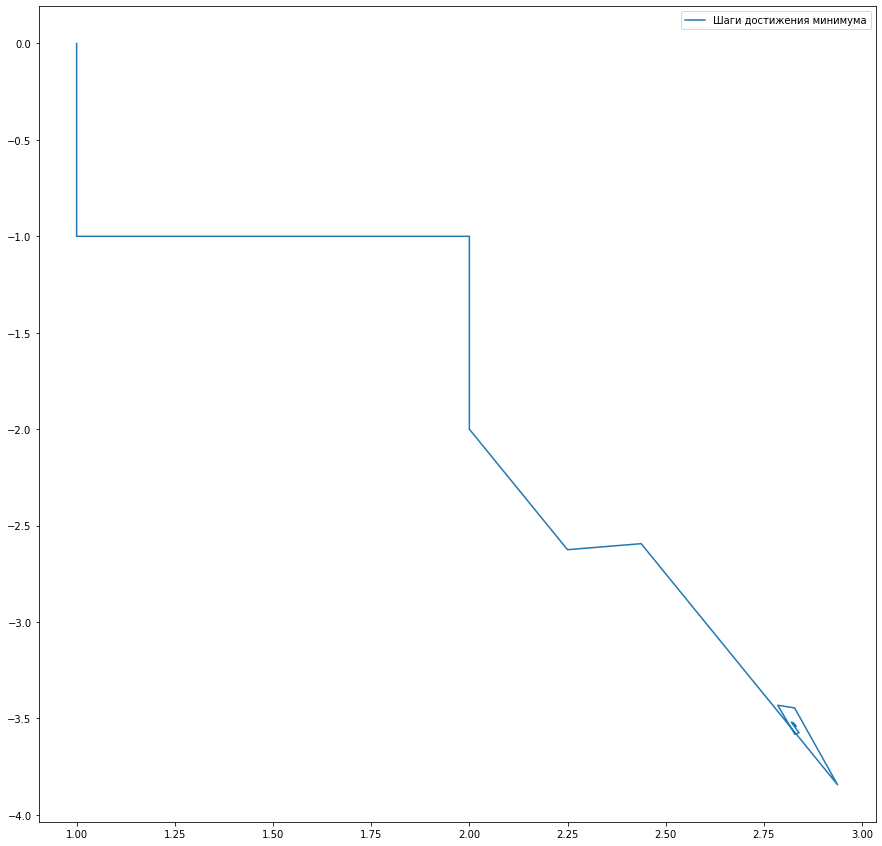

In [9]:
xs, ys = [], []
for vec in steps:
    xs.append(vec.c()[0])
    ys.append(vec.c()[1])
    
plt.plot(xs, ys, label="Шаги достижения минимума")
plt.legend()

<h4>Метод градиентного спуска</h4>

In [10]:
def func_derivative(x1, x2):
    return 2 * x1 - 20 + np.exp(x1 ** 2 + 2 * x2) * 2 * x1, 2 * x2 + 2 + np.exp(x1 ** 2 + 2 * x2) * 2

In [20]:
def gradient_decent(learning_rate=0.05, eps=1e-6):
    solution_steps = []
    min_x = 0
    min_y = 0
    
    dev_x, dev_y = func_derivative(min_x, min_y)
    iteration = 1
    
    gradient_step_x = (learning_rate / iteration ** 0.5) * dev_x
    gradient_step_y = (learning_rate / iteration ** 0.5) * dev_y
    
    while np.abs(gradient_step_x) > eps and np.abs(gradient_step_y) > eps:
        solution_steps.append((min_x, min_y))
        min_x -= gradient_step_x
        min_y -= gradient_step_y
        dev_x, dev_y = func_derivative(min_x, min_y)
        iteration += 1
        
        gradient_step_x = (learning_rate / iteration ** 0.5) * dev_x
        gradient_step_y = (learning_rate / iteration ** 0.5) * dev_y
    
    return (min_x, min_y), solution_steps

In [21]:
%%time
for i in range(100):
    solution, steps = gradient_decent()
solution

Wall time: 2.73 s


(2.8283331214155316, -3.5345321999827637)

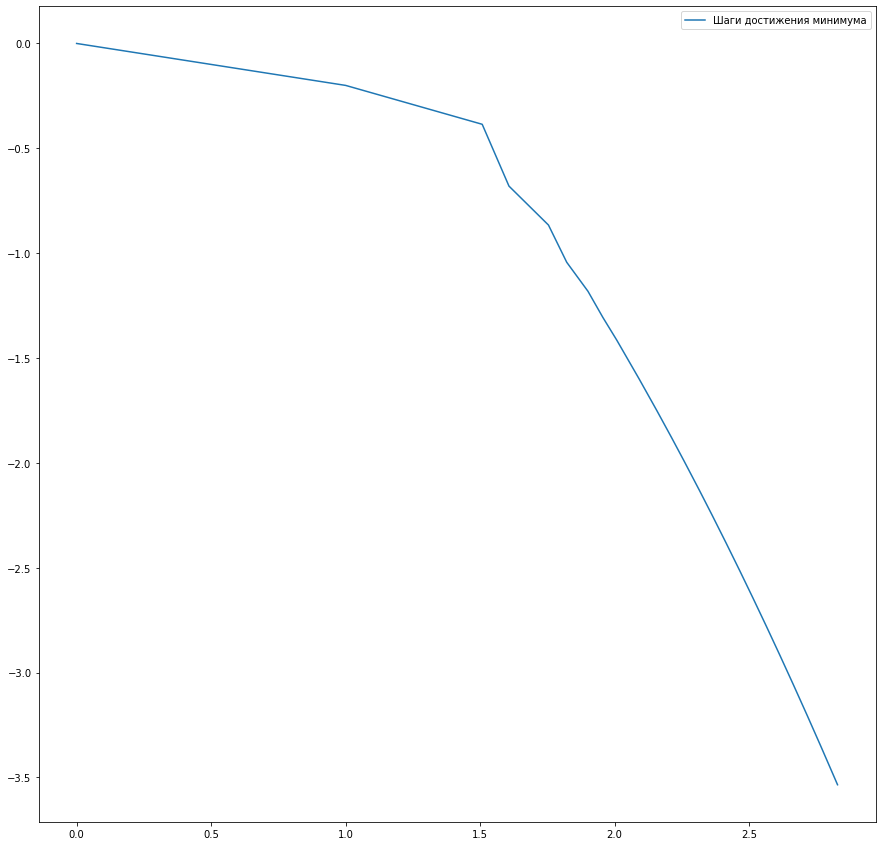

In [22]:
xs, ys = [], []
for step in steps:
    xs.append(step[0])
    ys.append(step[1])
    
plt.plot(xs, ys, label="Шаги достижения минимума")
plt.legend()